In [109]:
import nipype.interfaces.io as nio
import logging
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nb
# Let's create a short helper function to plot 3D NIfTI images
def plot_slice(fname):

    # Load the image
    img = nb.load(fname)
    data = img.get_data()

    # Cut in the middle of the brain
    cut = int(data.shape[-1]/2) + 10

    # Plot the data
    plt.imshow(np.rot90(data[..., cut]), cmap="gray")
    plt.gca().set_axis_off()

In [68]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [93]:
datasource = nio.DataGrabber()
datasource.inputs.base_directory = '/ADNI'
datasource.inputs.template = '*_S_*/MPR__GradWarp__B1_Correction__N3__Scaled*/*/S*/ADNI_*_S_*_MR_MPR__GradWarp__B1_Correction__N3__Scaled*_Br_*_S*_I*.nii'
datasource.inputs.sort_filelist = True
results = datasource.run()

logger.debug(f"Found {len(results.outputs.outfiles)} files.")

DEBUG:root:Found 1216 files.


In [87]:
!ls

ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii
S13408I45108.xml


In [135]:
# Import Node and Workflow object and FSL interface
from nipype import Node, Workflow, Function
from nipype.interfaces import fsl

# For reasons that will later become clear, it's important to
# pass filenames to Nodes as absolute paths
from os.path import abspath
in_file = abspath(abs_path)

# identity 


# Skullstrip process
skullstrip = Node(fsl.BET(in_file=in_file, mask=True), name="skullstrip")

# Smooth process
smooth = Node(fsl.IsotropicSmooth(in_file=in_file, fwhm=4), name="smooth")

# Mask process
mask = Node(fsl.ApplyMask(), name="mask")
Function?

In [123]:
# Initiation of a workflow
wf = Workflow(name="smoothflow", base_dir="/output/working_dir")

In [124]:
# First the "simple", but more restricted method
wf.connect(skullstrip, "mask_file", mask, "mask_file")

# Now the more complicated method
wf.connect([(in_file, mask, [("out_file", "in_file")])])

AttributeError: 'str' object has no attribute 'name'

200218-20:36:06,347 nipype.workflow INFO:
	 Generated workflow graph: /output/working_dir/smoothflow/workflow_graph.png (graph2use=hierarchical, simple_form=True).


INFO:nipype.workflow:Generated workflow graph: /output/working_dir/smoothflow/workflow_graph.png (graph2use=hierarchical, simple_form=True).


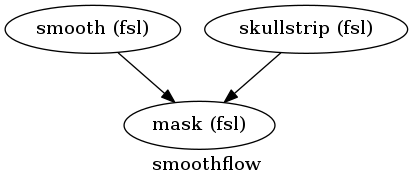

In [102]:
wf.write_graph("workflow_graph.dot")
from IPython.display import Image
Image(filename="/output/working_dir/smoothflow/workflow_graph.png")

200218-20:37:06,257 nipype.workflow INFO:
	 Generated workflow graph: /output/working_dir/smoothflow/graph.png (graph2use=flat, simple_form=True).


INFO:nipype.workflow:Generated workflow graph: /output/working_dir/smoothflow/graph.png (graph2use=flat, simple_form=True).


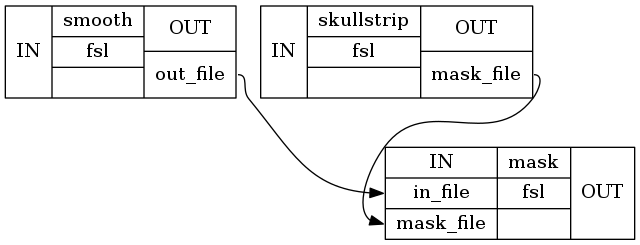

In [103]:
wf.write_graph(graph2use='flat')
from IPython.display import Image
Image(filename="/output/working_dir/smoothflow/graph_detailed.png")

In [111]:
# Specify the base directory for the working directory
wf.base_dir = "/output/working_dir"

# Execute the workflow
wf.run()

200218-20:41:51,486 nipype.workflow INFO:
	 Workflow smoothflow settings: ['check', 'execution', 'logging', 'monitoring']


INFO:nipype.workflow:Workflow smoothflow settings: ['check', 'execution', 'logging', 'monitoring']


200218-20:41:51,503 nipype.workflow INFO:
	 Running serially.


INFO:nipype.workflow:Running serially.


200218-20:41:51,505 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow.smooth" in "/output/working_dir/smoothflow/smooth".


INFO:nipype.workflow:[Node] Setting-up "smoothflow.smooth" in "/output/working_dir/smoothflow/smooth".


200218-20:41:51,513 nipype.workflow INFO:
	 [Node] Running "smooth" ("nipype.interfaces.fsl.maths.IsotropicSmooth"), a CommandLine Interface with command:
fslmaths /ADNI/002_S_0295/MPR__GradWarp__B1_Correction__N3__Scaled/2006-04-18_08_20_30.0/S13408/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii -s 1.69864 /output/working_dir/smoothflow/smooth/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_smooth.nii.gz


INFO:nipype.workflow:[Node] Running "smooth" ("nipype.interfaces.fsl.maths.IsotropicSmooth"), a CommandLine Interface with command:
fslmaths /ADNI/002_S_0295/MPR__GradWarp__B1_Correction__N3__Scaled/2006-04-18_08_20_30.0/S13408/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii -s 1.69864 /output/working_dir/smoothflow/smooth/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_smooth.nii.gz


200218-20:42:00,452 nipype.workflow INFO:
	 [Node] Finished "smoothflow.smooth".


INFO:nipype.workflow:[Node] Finished "smoothflow.smooth".


200218-20:42:00,460 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow.skullstrip" in "/output/working_dir/smoothflow/skullstrip".


INFO:nipype.workflow:[Node] Setting-up "smoothflow.skullstrip" in "/output/working_dir/smoothflow/skullstrip".


200218-20:42:00,494 nipype.workflow INFO:
	 [Node] Running "skullstrip" ("nipype.interfaces.fsl.preprocess.BET"), a CommandLine Interface with command:
bet /ADNI/002_S_0295/MPR__GradWarp__B1_Correction__N3__Scaled/2006-04-18_08_20_30.0/S13408/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii /output/working_dir/smoothflow/skullstrip/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_brain.nii.gz -m


INFO:nipype.workflow:[Node] Running "skullstrip" ("nipype.interfaces.fsl.preprocess.BET"), a CommandLine Interface with command:
bet /ADNI/002_S_0295/MPR__GradWarp__B1_Correction__N3__Scaled/2006-04-18_08_20_30.0/S13408/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii /output/working_dir/smoothflow/skullstrip/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_brain.nii.gz -m


200218-20:42:09,754 nipype.workflow INFO:
	 [Node] Finished "smoothflow.skullstrip".


INFO:nipype.workflow:[Node] Finished "smoothflow.skullstrip".


200218-20:42:09,759 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow.mask" in "/output/working_dir/smoothflow/mask".


INFO:nipype.workflow:[Node] Setting-up "smoothflow.mask" in "/output/working_dir/smoothflow/mask".


200218-20:42:09,768 nipype.workflow INFO:
	 [Node] Running "mask" ("nipype.interfaces.fsl.maths.ApplyMask"), a CommandLine Interface with command:
fslmaths /output/working_dir/smoothflow/smooth/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_smooth.nii.gz -mas /output/working_dir/smoothflow/skullstrip/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_brain_mask.nii.gz /output/working_dir/smoothflow/mask/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_smooth_masked.nii.gz


INFO:nipype.workflow:[Node] Running "mask" ("nipype.interfaces.fsl.maths.ApplyMask"), a CommandLine Interface with command:
fslmaths /output/working_dir/smoothflow/smooth/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_smooth.nii.gz -mas /output/working_dir/smoothflow/skullstrip/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_brain_mask.nii.gz /output/working_dir/smoothflow/mask/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_smooth_masked.nii.gz


200218-20:42:11,527 nipype.workflow INFO:
	 [Node] Finished "smoothflow.mask".


INFO:nipype.workflow:[Node] Finished "smoothflow.mask".


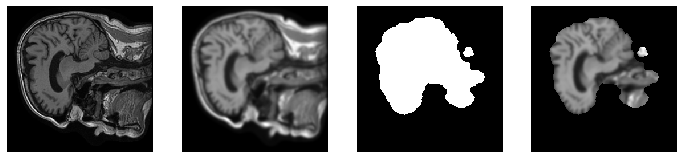

In [120]:
f = plt.figure(figsize=(12, 4))
for i, img in enumerate([abs_path,
                         "/output/working_dir/smoothflow/smooth/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_smooth.nii.gz",
                         "/output/working_dir/smoothflow/skullstrip/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_brain_mask.nii.gz",
                         "/output/working_dir/smoothflow/mask/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_smooth_masked.nii.gz"]):
    f.add_subplot(1, 4, i + 1)
    plot_slice(img)j

In [119]:
!ls /output/working_dir/smoothflow/skullstrip

_0x3122d06fe5361b236c7fbb29df5dd9a5.json
ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_brain_mask.nii.gz
command.txt
_inputs.pklz
_node.pklz
_report
result_skullstrip.pklz


In [129]:
!cp "/output/working_dir/smoothflow/mask/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_smooth_masked.nii.gz" "/ADNI"

In [133]:
!ls /ADNI/*nii.gz

/ADNI/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_smooth_masked.nii.gz
